In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

In [2]:
def conv_inp_out (entrada):
    dado = 'data/data/'+str(entrada)
    data = np.fromfile(str(dado))
    N = 3
    saidas_a=[]
    d_data = [data[n:n+N].tolist() for n in range(0, len(data), N)]
    entrada_full = [data[n:n+N].tolist() for n in range(0, len(data), N)]
    for i in d_data:
        saidas_a.append(i[-1])
        i.pop()
        entradas_a = d_data
        
    return (entradas_a,saidas_a,entrada_full)

In [3]:
def plot_pts(entradas,saidas,title):
    #Função para plotar gráfico com pontos (x,y) mais dispersos
    plot_x_1 = []
    plot_y_1 = []
    plot_x_0 = []
    plot_y_0 = []
    
    
    for i in range (0,len(entradas)):
        
        if len(entradas[i])==2:
            if saidas[i]==1.0:
                plot_x_1.append(entradas[i][0])
                plot_y_1.append(entradas[i][1])
            else:
                plot_x_0.append(entradas[i][0])
                plot_y_0.append(entradas[i][1])
        else:
            if saidas[i]==1.0:
                plot_x_1.append(entradas[i][1])
                plot_y_1.append(entradas[i][2])
            else:
                plot_x_0.append(entradas[i][1])
                plot_y_0.append(entradas[i][2])        
        

    x = plot_x_1
    y = plot_y_1
    a = plot_x_0
    b = plot_y_0
    
    plt.figure(figsize=(8,5))
    plt.scatter(x,y,s=3,alpha=1,label = 'Classe 1')
    plt.scatter(a,b,s=3,alpha=1, c='red', label= 'Classe 0')
    plt.title(title)
    plt.legend()
    #print('Gráfico gerado')
    plt.show()

In [4]:
entrada,saida,t_entrada = conv_inp_out('dataHoldout.txt')

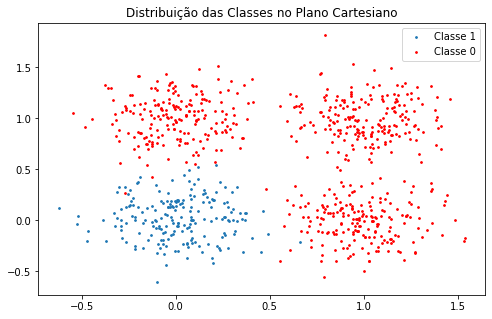

In [5]:
plot_pts(entrada,saida,'Distribuição das Classes no Plano Cartesiano')

##### Iniciando a mistura e separação da Base: 70% para treino e 30% para teste.

In [6]:
df = pd.DataFrame(t_entrada)
#Mistura
df = df.sample(frac=1).reset_index(drop=True)
#Separação
msk = np.random.rand(len(df)) < 0.7 # cria uma mascara com as posicoes
train = df[msk]
test = df[~msk]

In [7]:
#transformo a parte para treinamento e teste em lista
treinamento = train.values.tolist()
teste = test.values.tolist()

#Separamos a saida das amostras de teste e treino

saida_teste_r=[]
for i in teste:
    saida_teste_r.append(int(i[-1]))
    i.pop()
    
saida_treinamento=[]
saida_treinamento_r = []
for i in treinamento:
    saida_treinamento.append(i[-1])
    saida_treinamento_r.append(int(i[-1]))
    i.pop()
    
    
def treino(entradas,saidas,apz,vetori=[]):
    p0=[]
    w0=-1
    pesos=[]

    p1 = vetori[0]
    p2 = vetori[1]
    for i in range(3):
        r = rd.uniform(p1,p2)
        p0.append(r)
    w0  = np.array(w0)

    
    for entrada in entradas:
        entrada.insert(0, -1)
    entradas = np.array(entradas)


    epcs = 0
    ajustes = 0
    while True:
        ajus_epc=0
        erro = False

        for i in range(len(entradas)): 

            u = 0
            u = u + (np.vdot(entradas[i],p0))
            y = activate(u)

            if saidas[i]-y!=0.0:
                erro_aux = saidas[i]-y
                p0 = p0+(apz*erro_aux*(entradas[i]))
                ajustes += 1
                ajus_epc+=1
                
                pesos.append(p0)
                erro = True
                #print('Época ',epcs,': ',ajus_epc,' ajustes.')
        epcs+=1
        if not erro or epcs>100:
            break

    #print('a) Alterações no vetor de Pesos:',ajustes)
    #print(p0)
    #print('-----------------------------------------------------------\n')
    #print("b) Números de épocas até a convergência:",epcs)
    #print('-----------------------------------------------------------\n')
    return p0


def activate(u):
    if u>0:
        return 1.0
    else:
        return 0.0
    
#Função para Testar 
def testar(p0,amostra=[]):
    # Inserir o valor do limiar na posição "0" para cada amostra da lista "amostras"
    if len(amostra)!=3:
        amostra.insert(0,-1)
    # Inicializar potencial de ativação
    u = 0
    # Para cada atributo...
    for i in range(len(amostra)):
        u = 0
        u = u + (np.vdot(amostra,p0))
        y = activate(u)
        # Multiplicar amostra e seu peso e também somar com o potencial que já tinha
        #u += self.pesos[i] * amostra[i]
    # Obter a saída da rede considerando g a função
    y = activate(u)
    #print('Classe: %d' % y)
    return y

##### Realizamos agora o treinamento do Neurônio, que após a Parte II deste trabalho, usamos os seguintes parâmetros:
Taxa de Aprendiazado: 0.4 / Intervalo Inicial de Pesos: (-0.5,+0.5)/ Limite de parada até a convergencia ou até 100 épocas

In [8]:
xxxxx = treino(treinamento,saida_treinamento,0.4,[-0.5,0.5])

In [9]:
#Passamos todas as amostras em testes e alocamos em um vetor com a predição das classes.
saidas_pred_teste = []
for i in teste:
    #print(i)
    saidas_pred_teste.append(int(testar(xxxxx,i)))

In [10]:
saidas_pred_treino = []
for i in treinamento:
    #print(i)
    saidas_pred_treino.append(int(testar(xxxxx,i)))

##### 1.Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;

Realizamos a Plotagem da Matriz de Confusão sobre as amostras de Teste

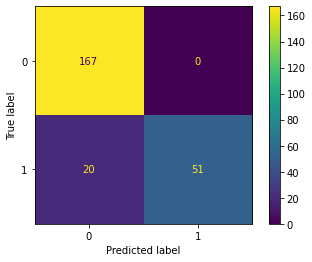

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm =confusion_matrix(saida_teste_r, saidas_pred_teste)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [12]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

##### Verificamos a Acurácia / Revocação / Precisão / F-Score usando os dados do Treinamento

In [13]:

accuracy_score(saida_treinamento_r, saidas_pred_treino)

0.9448398576512456

In [14]:
recall_score(saida_treinamento_r, saidas_pred_treino, average='macro')

0.8934511341461231

In [15]:
precision_score(saida_treinamento_r, saidas_pred_treino, average='macro')

0.9482174906183717

In [16]:
f1_score(saida_treinamento_r, saidas_pred_treino, average='macro')

0.917124522521751

##### Verificamos a Acurácia / Revocação / Precisão / F-Score usando os dados de Teste

In [18]:
accuracy_score(saida_teste_r, saidas_pred_teste) 

0.9159663865546218

In [19]:
recall_score(saida_teste_r, saidas_pred_teste, average='macro')

NameError: name 'saidas_pred' is not defined

In [20]:
precision_score(saida_teste_r, saidas_pred_teste, average='macro')

NameError: name 'saidas_pred' is not defined

In [ ]:
f1_score(saida_teste_r, saidas_pred, average='macro')

    Com o Valor da Acurácia alto (94%), podemos achar que é um sinal positivo, mas temos que considerar que a maior parte dos dados são da Classe 0, ou seja, se o modelo prever todos os testes como classe 0, provavelmente ainda resultará em um valor alto de acurácia.
    Na precisão, podemos verificar que o modelo apresenta um  bom acerto quanto os classificados como positivamente, portanto o modelo possui pouco Falso Positivo.
    Quanto ao Revocação, Dentre os Valores das classes esperadas, o modelo acertou cerca de 95%, um valor satisfatório e se juntarmos com a Precisão, F1-Score, verificamos que o modelo em si é satisfátorio. Mas lembrando da desproporção dos dados da Base, algo q afeta tanto a acurácia, quanto a precisão.
    

In [ ]:
plot_pts(teste,saidas_pred_teste,'Distribuição das Classes obtidas pelo Perceptron com Dados de Teste'),plot_pts(treinamento,saidas_pred_treino,'Distribuição das Classes obtidas pelo Perceptron com Dados de Treino')

    Verificamos no grafico, principalmente no que utiliza dados de Treino, a possibilidade de haver uma reta que divide as Classes obtidas. Algo que não está muito claro no conjunto de Teste (Talvez por haver poucos pontos), mas possivelmente, se inserirmos mais amostras, poderíamos verificar a mesma situação.